# Importing Required Modules

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
rain = pd.read_csv("weatherAUS.csv")
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Describing the attributes

In [3]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Checking Missing values

In [4]:
rain.isnull().sum()*100/len(rain)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

# Treating Missing values

In [5]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [6]:
#Filling the missing values for categorical variables with mode
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [7]:
rain.isnull().sum()*100/len(rain)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

# Data Visualization

## Direction of wind at 9 am, 3 pm.

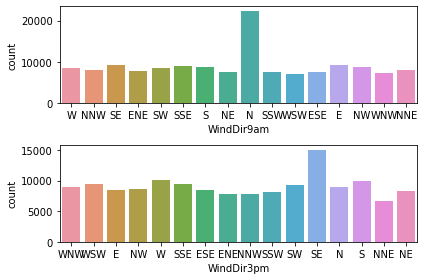

<Figure size 720x720 with 0 Axes>

In [8]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.countplot(data=rain,x='WindDir9am',ax=ax[0])
sns.countplot(data=rain,x='WindDir3pm',ax=ax[1])
fig.tight_layout()

* At 9 am, it is highest for direction N.
* At 3 pm, it is highest for direction SE.

In [9]:
#Dropping date column
rain=rain.iloc[:,1:]
rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.6,5.468232,7.611178,W,44.00000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,7.4,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,12.9,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,9.2,0.0,5.468232,7.611178,NE,24.00000,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,17.5,1.0,5.468232,7.611178,W,41.00000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,2.8,0.0,5.468232,7.611178,E,31.00000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,Uluru,3.6,3.6,0.0,5.468232,7.611178,NNW,22.00000,SE,N,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,Uluru,5.4,5.4,0.0,5.468232,7.611178,N,37.00000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,Uluru,7.8,7.8,0.0,5.468232,7.611178,SE,28.00000,SSE,N,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


# Encoding the categorical variables

In [10]:
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])
rain['RainToday'] = le.fit_transform(rain['RainToday'])
rain['RainTomorrow'] = le.fit_transform(rain['RainTomorrow'])

In [11]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


**Heatmap**

<AxesSubplot:>

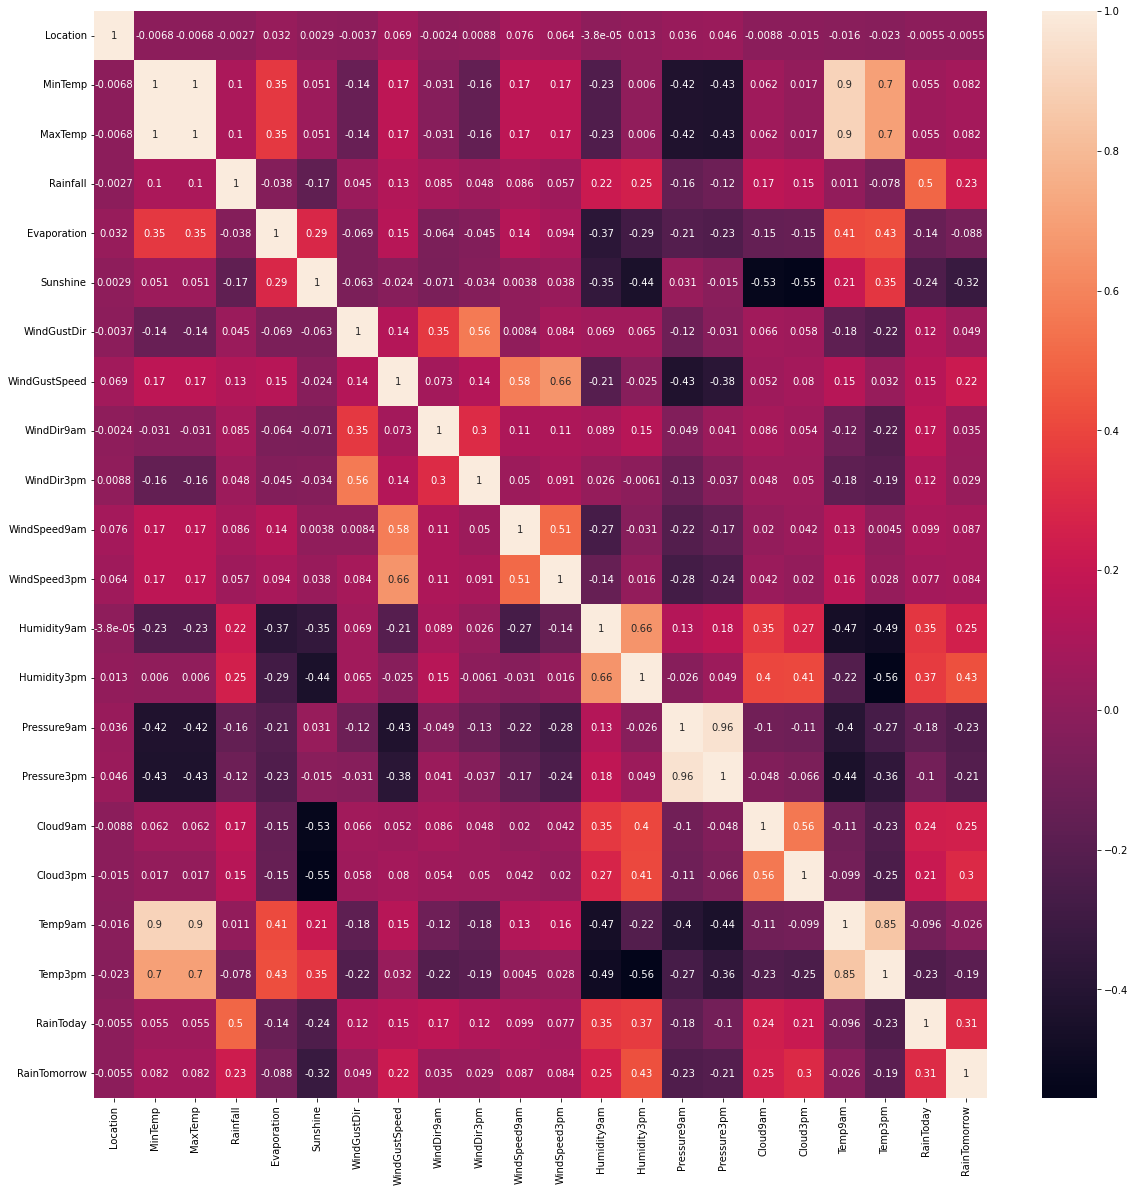

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(),annot = True)

*  MinTemp and Temp9am highly correlated.
*  MinTemp and Temp3pm highly correlated.
*  MaxTemp and Temp9am highly correlated.
*  MaxTemp and Temp3pm highly correlated.
*  Temp3pm and Temp9am highly correlated.
*  Humidity9am and Humidity3pm highly correlated.

In [13]:
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136653, 22)


**Dropping highly correlated variables**

In [14]:
rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Data Partition

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
                                   rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)

**Balancing Data using SMOTE**

In [16]:
os = SMOTE()
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({0: 86876, 1: 86876})


# Training the Models


## Logistic Regression

In [24]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train, y_train)
predicted1 =logreg.predict(x_test)
conf = confusion_matrix(y_test, predicted1)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted1)*100, "%")

The accuracy of Logistic Regression is :  77.41392557901284 %


## XGBoost

In [25]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
predicted2 = xgbc.predict(x_test)
print ("The accuracy of XGBoost Regression is : ", accuracy_score(y_test, predicted2)*100, "%")

The accuracy of XGBoost Regression is :  85.31338041052285 %


## Gaussian NB

In [27]:
gnb = GaussianNB()
gnb.fit(x_train, y_train) 
predicted3 = gnb.predict(x_test)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted3)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  76.80289780834948 %


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
Ranforest = RandomForestClassifier(n_estimators = 100, random_state = 0)  
Ranforest.fit(x_train, y_train)  
predicted4 = Ranforest.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted4)*100, "%")

The accuracy of Random Forest is :  84.31817350261608 %


**XGBoost model has highest accuracy**